# Question 1 : KNN Classifier to predict digits from images of handwrittendigits in the dataset

First, we will import the required libraries like numpy, pandas, mathplot, etc. and sklearn to find F1 score, Accuracy, confusion_matrix, etc.

## Importing Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Reading Datasets

Lets first see what our data set contains.
#### Here, we don't require to preprocess the data.

In [12]:
dataset_train=pd.read_csv('Datasets/q1/train.csv')
dataset_train

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.698,0.699,0.700,0.701,0.702,0.703,0.704,0.705,0.706,0.707
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here, there is no header in the dataset. So we have to add 'header=None' while calling read_csv()

In [13]:
dataset_train=pd.read_csv('Datasets/q1/train.csv',header=None)
dataset_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test_data=pd.read_csv('Datasets/q1/test.csv',header=None)
test_data

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
test_label=pd.DataFrame(pd.read_csv('Datasets/q1/test_labels.csv',header=None)).to_numpy()
test_label

array([[9],
       [4],
       [7],
       [1],
       [7],
       [6],
       [6],
       [4],
       [2],
       [3],
       [5],
       [1],
       [6],
       [4],
       [7],
       [9],
       [5],
       [1],
       [5],
       [3],
       [8],
       [5],
       [4],
       [6],
       [0],
       [9],
       [6],
       [8],
       [2],
       [7],
       [8],
       [6],
       [6],
       [5],
       [6],
       [6],
       [5],
       [9],
       [9],
       [3],
       [9],
       [0],
       [7],
       [6],
       [7],
       [5],
       [1],
       [9],
       [1],
       [1],
       [7],
       [7],
       [4],
       [1],
       [4],
       [9],
       [0],
       [3],
       [2],
       [9],
       [6],
       [7],
       [9],
       [6],
       [4],
       [3],
       [9],
       [6],
       [9],
       [2],
       [8],
       [4],
       [7],
       [2],
       [7],
       [4],
       [6],
       [0],
       [1],
       [9],
       [2],
       [3],
       [2],
    

### Dividing Dataset into validate and train

First, we will divide the train dataset into train and validate sets.
80% will be train dataset and 20% will be validate dataset.

In [27]:
train, validate = np.split(pd.DataFrame(dataset_train).to_numpy(), [int(0.8*20000)])

Now, for different values of K, we will get different accuarcy and the one with the best accuarcy will the final value of K

In [28]:
K=3

In [ ]:
for KK in range(3,10,2):
    correct=0
    wrong=0
    for entry in validate:
        #print(entry)
        dists=[]
        for train_entry in train:
            dist = np.linalg.norm(entry[1:]-train_entry[1:]) #euclidian distance
            dists.append([dist,train_entry[0]])
        dists.sort()

        map={}
        for k in range(KK):
            if(dists[k][1] in map):
                map[dists[k][1]]+=1
            else:
                map[dists[k][1]]=0
        maxvalue=-1
        maxk=0
        for k,v in map.items():
            if(v>maxvalue):
                maxvalue=v
                maxk=k

        if(entry[0]==maxk):
            correct+=1
        else:
            wrong+=1

    #print(correct,wrong)
    acc=correct/4000*100
    print(KK,acc)
    if(acc>maxacc):
        maxacc=acc
        K=KK


In [33]:
dataset_train=pd.DataFrame(dataset_train).to_numpy()

## Manhatten Distance <br>
# d= ${\sum_{i=1}^{N}{\left|{x_i}-{y_i}\right|}}$


In [ ]:
 #using manhattan
correct=0
wrong=0
for entry in validate:
    #print(entry)
    dists=[]
    for train_entry in train:
        dist = np.linalg.norm(entry[1:]-train_entry[1:],ord=1)
        dists.append([dist,train_entry[0]])
    dists.sort()

    map={}
    for k in range(KK):
        if(dists[k][1] in map):
            map[dists[k][1]]+=1
        else:
            map[dists[k][1]]=0
    maxvalue=-1
    maxk=0
    for k,v in map.items():
        if(v>maxvalue):
            maxvalue=v
            maxk=k

    if(entry[0]==maxk):
        correct+=1
    else:
        wrong+=1

#print(correct,wrong)
acc=correct/4000*100
print(KK,acc)

### Euclidean Distance is used in the testing

In [34]:
test=pd.DataFrame(test_data).to_numpy()
ans=[]

for entry in test:
    #print(entry)
    dists=[]
    for train_entry in dataset_train:
        dist = np.linalg.norm(entry[:]-train_entry[1:]) #euclidean distance
        dists.append([dist,train_entry[0]])
    dists.sort()

    map={}
    for k in range(K):
        if(dists[k][1] in map):
            map[dists[k][1]]+=1
        else:
            map[dists[k][1]]=0
    maxvalue=-1
    maxk=0
    for k,v in map.items():
        if(v>maxvalue):
            maxvalue=v
            maxk=k

    ans.append(maxk)

In [38]:
ans

['9',
 '4',
 '7',
 '1',
 '7',
 '6',
 '6',
 '4',
 '2',
 '3',
 '5',
 '1',
 '6',
 '4',
 '7',
 '9',
 '5',
 '1',
 '5',
 '3',
 '8',
 '5',
 '4',
 '6',
 '0',
 '9',
 '6',
 '5',
 '2',
 '7',
 '8',
 '6',
 '6',
 '5',
 '6',
 '6',
 '5',
 '7',
 '9',
 '3',
 '9',
 '0',
 '7',
 '6',
 '7',
 '5',
 '1',
 '9',
 '1',
 '1',
 '7',
 '7',
 '9',
 '1',
 '4',
 '9',
 '0',
 '3',
 '2',
 '9',
 '6',
 '7',
 '9',
 '6',
 '4',
 '3',
 '9',
 '6',
 '9',
 '2',
 '0',
 '4',
 '7',
 '2',
 '2',
 '4',
 '6',
 '0',
 '1',
 '9',
 '2',
 '3',
 '2',
 '4',
 '2',
 '0',
 '3',
 '5',
 '6',
 '1',
 '2',
 '3',
 '9',
 '6',
 '0',
 '5',
 '2',
 '8',
 '4',
 '2',
 '8',
 '5',
 '2',
 '7',
 '8',
 '2',
 '9',
 '2',
 '1',
 '7',
 '6',
 '0',
 '3',
 '0',
 '4',
 '5',
 '0',
 '2',
 '3',
 '5',
 '2',
 '0',
 '6',
 '2',
 '9',
 '7',
 '9',
 '9',
 '1',
 '9',
 '7',
 '0',
 '4',
 '8',
 '2',
 '9',
 '1',
 '2',
 '3',
 '0',
 '3',
 '3',
 '9',
 '3',
 '0',
 '0',
 '8',
 '3',
 '3',
 '9',
 '8',
 '9',
 '5',
 '7',
 '5',
 '4',
 '9',
 '2',
 '7',
 '6',
 '9',
 '6',
 '0',
 '9',
 '4',
 '8',
 '3'

In [39]:
test_labels = list()
with open("./Datasets/q1/test_labels.csv") as f:
    for line in f:
        test_labels.append(line.strip())
print (accuracy_score(test_labels, ans))

0.969


## Test result


## K=3

## Accuracy Score

In [40]:
accuracy_score(test_labels, ans)

0.969

## Confusion Matrix

In [41]:
confusion_matrix(test_labels, ans)

array([[ 93,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 101,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 107,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0, 107,   0,   0,   1,   0,   0,   0],
       [  0,   1,   0,   0,  83,   0,   1,   0,   0,   6],
       [  0,   0,   0,   1,   0,  79,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0, 101,   0,   0,   0],
       [  0,   2,   1,   0,   1,   0,   0,  97,   0,   3],
       [  1,   0,   1,   3,   0,   2,   0,   0,  93,   0],
       [  1,   0,   1,   0,   0,   0,   0,   2,   0, 108]])

## Precision Score

In [44]:
print(precision_score(test_labels, ans, average='macro'),
precision_score(test_labels, ans, average='micro'),
precision_score(test_labels, ans, average='weighted'))

0.9703788802695111 0.969 0.9694742353813575


## Recall Score

In [45]:
print(recall_score(test_labels, ans, average='macro'),
recall_score(test_labels, ans, average='micro'),
recall_score(test_labels, ans, average='weighted'))

0.9685217759650383 0.969 0.969


## F1 Score

In [46]:
print(f1_score(test_labels, ans, average='macro'),
f1_score(test_labels, ans, average='micro'),
f1_score(test_labels, ans, average='weighted'))


0.9690533807712107 0.969 0.968844604987644


### Accuracy calculate above during training

In [47]:
K=[3, 5, 7 ,9]
Acc=[0.969,0.9511309608540926, 0.94332309608540926 ,0.932220640569395]

## Accuracy vs K plot

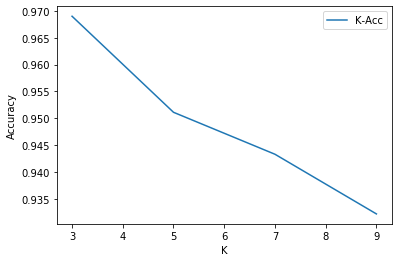

In [50]:
plt.plot(K,Acc,label='K-Acc')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()

In [51]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

## KNN Using Scikit learn

In [53]:
data = pd.read_csv('Datasets/q1/train.csv',header=None)
X = data.iloc[:, 1: 785].values        
Y = data.iloc[:, 0].values         

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)
series_2 = pd.Series([Y_train])
series_1 = pd.Series([X_train])

dataframe1=pd.concat([series_1, series_2],axis=1)
neighbour = KNeighborsClassifier(n_neighbors=5)
neighbour.fit(X_train, Y_train)
p = neighbour.predict(X_test)
print (confusion_matrix(Y_test,p))
print (classification_report(Y_test,p))
print (accuracy_score(Y_test,p))

[[419   0   0   0   0   1   0   0   0   0]
 [  0 467   2   0   1   0   0   0   0   0]
 [  2   6 366   5   0   0   2   4   3   0]
 [  0   2   5 360   0   5   0   1   3   3]
 [  0   4   0   0 354   0   1   0   0  15]
 [  3   2   0   5   0 327   5   0   0   5]
 [  0   1   0   0   2   3 388   0   0   0]
 [  0  10   3   0   3   0   0 422   0   6]
 [  2  10   3  10   0  10   1   0 357   3]
 [  2   1   3   4   4   1   0   5   0 368]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       420
           1       0.93      0.99      0.96       470
           2       0.96      0.94      0.95       388
           3       0.94      0.95      0.94       379
           4       0.97      0.95      0.96       374
           5       0.94      0.94      0.94       347
           6       0.98      0.98      0.98       394
           7       0.98      0.95      0.96       444
           8       0.98      0.90      0.94       396
           9       0.92     